# Final Project

In [1]:
print("我準備好了")

我準備好了


In [2]:
import auto_update
#記得要去三大法人爬蟲更新籌碼面指標

twse_divide_ratio -- 資料日期
twse_divide_ratio -- 股票代號
twse_divide_ratio -- 股票名稱
twse_divide_ratio -- 除權息前收盤價
twse_divide_ratio -- 除權息參考價
twse_divide_ratio -- 權值+息值
twse_divide_ratio -- 權/息
twse_divide_ratio -- 漲停價格
twse_divide_ratio -- 跌停價格
twse_divide_ratio -- 開盤競價基準
twse_divide_ratio -- 減除股利參考價
twse_divide_ratio -- 詳細資料
twse_divide_ratio -- 最近一次申報資料 季別/日期
twse_divide_ratio -- 最近一次申報每股 (單位)淨值
twse_divide_ratio -- 最近一次申報每股 (單位)盈餘
twse_divide_ratio -- twse_divide_ratio
otc_divide_ratio -- 除權息日期
otc_divide_ratio -- 代號
otc_divide_ratio -- 名稱
otc_divide_ratio -- 除權息前收盤價
otc_divide_ratio -- 除權息參考價
otc_divide_ratio -- 權值
otc_divide_ratio -- 息值
otc_divide_ratio -- 權+息值
otc_divide_ratio -- 權/息
otc_divide_ratio -- 漲停價格
otc_divide_ratio -- 跌停價格
otc_divide_ratio -- 開盤競價基準
otc_divide_ratio -- 減除股利參考價
otc_divide_ratio -- 現金股利
otc_divide_ratio -- 每千股無償配股
otc_divide_ratio -- -
otc_divide_ratio -- 現金增資股數
otc_divide_ratio -- 現金增資認購價
otc_divide_ratio -- 公開承銷股數
otc_divide_ratio -- 員工認購股數
otc_divide_ratio -

### 獲取歷史資料

In [2]:
from finlab.data import Data
from finlab_old.data import Data as data1
import pandas as pd
import sqlite3
import os
import numpy as np
import datetime
import numpy as np
from finlab import ml
import pandas_profiling
conn = sqlite3.connect(os.path.join('data', 'data.db'))
pd = pd.read_sql('select * from legal_person',conn,index_col = ['date'])
## 上面沒有整理

data1 = data1()


data = Data()

big = data1.get('三大法人買賣超股數',10000000).fillna(0)
#big0 = data1.get('外陸資買賣超股數(不含外資自營商)',10000000).fillna(0)
#le0 = data1.get('外資買進股數',10000000).fillna(0)
#le1 = data1.get('投信買進股數',10000000).fillna(0)
#le3 = data1.get('三大法人買超股數',10000000).fillna(0)
#bigm = big.rolling(3).sum()
rev = data.get("當月營收")
close = data.get("收盤價")
pbe = data.get('股價淨值比')
pe = data.get('本益比')
rev.index = rev.index.shift(6, "d")
#取決於幾號買賣
#total = big0+big
#q = ml.fundamental_features()
#a = q>0
#free_m_ratio = q["R205_現金流量比率"]
#twii= data.get("發行量加權股價指數")

In [3]:
T0112現金及約當現金 = data.get("期末現金及約當現金餘額")
T3900繼續營業部門稅前純益 = data.get('繼續營業單位稅前淨利（淨損）')
T3970經常稅後淨利 = data.get('本期淨利（淨損）').fillna(data.get('本期稅後淨利（淨損）'))
T2000權益總計 = data.get('權益總計').fillna(data.get('權益總額'))
T3295營業毛利 = data.get('營業毛利（毛損）').fillna(data.get('營業毛利（毛損）淨額'))
T3100營業收入淨額 = data.get("營業收入合計")
T3700營業外收入及支出 = data.get("營業外收入及支出合計").fillna(data.get("營業外損益合計"))
T3910所得稅費用 = (data.get("所得稅費用（利益）合計").fillna(data.get("本期所得稅費用（利益）"))
    .fillna(data.get("當期所得稅費用（利益）"))
    .fillna(data.get("所得稅費用（利益）淨額"))
    .fillna(data.get("所得稅費用（利益）"))
    .fillna(-data.get("所得稅（費用）利益").fillna(data.get("所得稅利益（費用）")).dropna(how='all', axis=1))
)
T3300營業費用 = data.get("營業費用合計")
T7211折舊 = data.get('折舊費用', table='cash_flows')
T7212攤提 = data.get('攤銷費用', table='cash_flows')

T3920繼續營業部門純益 = T3900繼續營業部門稅前純益 - T3910所得稅費用
T0170存貨 = data.get("存貨合計").fillna(data.get("存貨"))
股本 = data.get('股本合計')
T0400不動產廠房設備合計 = (data.get("不動產、廠房及設備合計")
                  .fillna(data.get("不動產、廠房及設備"))
                  .fillna(data.get("不動產及設備合計"))
                  .fillna(data.get('不動產、廠房及設備淨額'))
                  .fillna(data.get("不動產及設備－淨額"))
                 )
T0960非流動資產 = data.get("非流動資產合計").fillna(data.get("非流動資產淨額"))
T1800非流動負債 = data.get("非流動負債合計")
T1100流動負債 = data.get("流動負債合計").fillna(data.get("流動負債總額"))
T0100流動資產 = data.get("流動資產合計")
T3501財物成本 = data.get('財務成本').fillna(data.get("財務成本淨額"))
T0010資產總額 = T0100流動資產 + T0960非流動資產
T3971本期綜合損益總額 = data.get("本期綜合損益總額").fillna(data.get("綜合損益總額"))
T3395營業利益 = data.get('營業利益（損失）').fillna(data.get('營業利益'))
T2403稅前息前折舊前淨利 = T3900繼續營業部門稅前純益 + T3501財物成本 + T7211折舊 + T7212攤提
T2402稅前息前淨利 = T3900繼續營業部門稅前純益 + T3501財物成本
R202用人費用率 = data.get("管理費用合計").fillna(data.get("管理費用"))
T3356研究發展費 = data.get("研究發展費用").fillna(data.get("研究發展費用合計")).fillna(data.get("委託研究費"))
T7210營運現金流 = data.get("營運產生之現金流入（流出）")
T3950歸屬母公司淨利 = data.get("歸屬於母公司業主之權益合計")
T1000負債總額 = data.get("負債總額").fillna(data.get("負債總計"))
T3200營業成本 = data.get("營業成本合計")
T7324取得不動產廠房及設備 = (data.get("取得不動產、廠房及設備")
                  .fillna(data.get("取得不動產及設備")))
R103_ROE稅後 =  T3920繼續營業部門純益 /(T2000權益總計 + T2000權益總計.shift()).abs() * 2 * 100
R11U_ROE綜合損益 =  (T3971本期綜合損益總額/((T2000權益總計+T2000權益總計.shift())/2)) * 100

In [7]:
roe = R103_ROE稅後.dropna(how='all',axis=1)

In [26]:
roe_new = (roe/roe.shift()/pbe).dropna(how='all',axis=0)

In [27]:
roe_new

stock_id,1101,1102,1103,1104,1107,1108,1109,1110,1201,1203,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2013-11-14,1.344003,0.946417,-23.021288,1.318206,NaN,2.005267,1.550215,2.072082,0.575309,1.131476,...,1.272588,0.399156,0.984514,0.025410,0.546291,0.291287,-0.029056,1.367882,1.481490,1.446949
2014-03-31,0.828318,0.986204,9.977563,1.036920,NaN,1.265454,2.732341,0.660220,0.391846,0.809851,...,0.747691,2.734495,0.705023,147.201502,0.523303,0.180881,-28.568175,0.891019,1.062615,1.070645
2014-05-15,0.107234,0.150483,-0.046420,0.172103,NaN,0.405966,0.311284,0.498172,0.086454,0.222064,...,0.233693,0.017303,0.023116,0.209250,0.088689,0.041560,-0.212549,0.165456,0.002320,0.151137
2014-08-14,1.950448,2.980083,-0.215338,2.374627,NaN,4.247561,2.772038,1.458176,0.704110,1.467585,...,0.866825,1.122538,-0.467735,0.585568,1.741986,0.395252,1.613809,1.892222,56.364547,2.629184
2014-11-14,1.163108,1.512177,103.370919,1.363417,NaN,1.540481,1.349389,1.668116,0.674484,1.085019,...,0.870970,3.116242,-0.880420,-1.673284,1.138677,0.279473,1.801874,1.290753,2.449739,1.972931
2015-03-31,0.883034,1.365399,0.784757,1.099315,NaN,1.279607,1.179051,0.795042,-0.042939,0.995468,...,0.930823,1.300961,3.375129,-0.772160,0.612093,0.213322,2.411754,1.349142,0.794340,0.438011
2015-05-15,0.035707,0.137732,-4.107146,0.154596,NaN,0.376490,0.003613,0.224808,6.790858,0.306734,...,0.187589,0.110503,0.128758,-2.255671,0.093784,0.026985,0.222748,0.071808,0.080816,-1.187719
2015-08-14,4.247123,3.843621,1.230228,2.574991,NaN,2.428977,-19.014646,1.763914,1.551962,1.436684,...,1.699716,1.443373,2.408450,2.651932,1.458280,0.581975,-4.540520,2.111234,2.394423,1.619277
2016-03-31,1.323710,1.572572,-1.587029,1.675135,NaN,1.319132,0.230653,1.224146,1.109770,0.871646,...,1.121881,0.533657,2.198452,1.334910,1.052531,0.191924,NaN,2.208167,0.914512,1.628083


### 計算features

In [28]:
def legal(n):
    legal = big.rolling(n,min_periods=1).sum()
    #legal = legal.replace([np.inf, -np.inf], np.nan).fillna(0)
    return legal

def SMA(n):
    return close.rolling(n, min_periods=1).mean()/n

def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    "SMA5":SMA(5),
    "SMA10":SMA(10),
    "SMA20":SMA(20),
    "SMA60":SMA(60),
    "SMA120":SMA(120),
    "SMA240":SMA(240),
    
    
    
    'pe':pe,
    'pbe':pbe,
    'roe_new':roe_new
    

    
}
 #  'legal5':legal(5),
 #  'legal10':legal(10),
 #  'legal20':legal(20),
 #  'legal60':legal(60),
 #  'legal120':legal(120),
 #  'legal240':legal(240),
  #  'rsv5': rsv(5),
  #  'rsv10': rsv(10),
  #  'rsv20': rsv(20),
  #  'rsv60': rsv(60),
  #  'rsv120': rsv(120),
  #  'rsv240': rsv(240),
   # 'big1':big1,
   # 'big2':big2,
   # 'big3':big3,

### 製作dataset

##### 設定買賣頻率

In [29]:
every_month = rev.index
every_month

DatetimeIndex(['2005-02-16', '2005-03-16', '2005-04-16', '2005-05-16',
               '2005-06-16', '2005-07-16', '2005-08-16', '2005-09-16',
               '2005-10-16', '2005-11-16',
               ...
               '2019-07-16', '2019-08-16', '2019-09-16', '2019-10-16',
               '2019-11-16', '2019-12-16', '2020-02-16', '2020-03-16',
               '2020-04-16', '2020-05-16'],
              dtype='datetime64[ns]', name='date', length=183, freq=None)

##### 將dataframe 組裝起來

In [30]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [31]:

for name, f in features.items():
    features[name] = f.unstack()

In [32]:
import pandas as pd
dataset = pd.DataFrame(features)

In [33]:
feature_names = list(dataset.columns)

### 新增 label

In [34]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

In [35]:
import sklearn.preprocessing as preprocessing
dataset_scaled = pd.DataFrame(preprocessing.scale(dataset),index = dataset.index , columns = dataset.columns)
dataset_scaled["return"] = dataset["return"]
dataset_scaled["rank"] = dataset["rank"]
#dataset_scaled["free_m_ratio"] = dataset["free_m_ratio"]
# 可以把其他東西放回來 除了以下這些
#dataset['pe'] = dataset['pe'].rank(pct=True)
#dataset['pbe'] = dataset['pbe'].rank(pct=True)
#dataset['legal5'] = dataset['legal5'].rank(pct=True)
#dataset['legal10'] = dataset['legal10'].rank(pct=True)
#dataset['legal20'] = dataset['legal20'].rank(pct=True)
#dataset['legal60'] = dataset['legal60'].rank(pct=True)
#dataset['legal120'] = dataset['legal120'].rank(pct=True)
#dataset['legal240'] = dataset['legal240'].rank(pct=True)
#dataset['big2'] = dataset['big2'].rank(pct=True)
#dataset['big3'] = dataset['big3'].rank(pct=True)

### 刪除太大太小的歷史資料

In [36]:
print(dataset.shape)

dataset = ml.drop_extreme_case(dataset_scaled, 
    ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6']
                               ,thresh=0.01)

print(dataset.shape)


(363072, 32)
(340082, 32)


In [37]:
dataset_dropna = dataset.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [38]:
dataset_dropna.index.get_level_values("date")

DatetimeIndex(['2013-11-16', '2013-12-16', '2014-01-16', '2014-02-16',
               '2014-03-16', '2014-04-16', '2014-05-16', '2014-06-16',
               '2014-07-16', '2014-08-16',
               ...
               '2019-06-16', '2019-07-16', '2019-08-16', '2019-09-16',
               '2019-10-16', '2019-11-16', '2019-12-16', '2020-02-16',
               '2020-03-16', '2020-04-16'],
              dtype='datetime64[ns]', name='date', length=74812, freq=None)

In [41]:
dataset_train = dataset_dropna[:'2018']
dataset_test = dataset_dropna['2019':]

### 神經網路模型

In [44]:
import keras
from keras.initializers import he_normal
import os
from keras.layers.advanced_activations import LeakyReLU, PReLU
os.environ['KMP_DUPLICATE_LIB_OK']='True'
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=he_normal(seed=0)))

model.add(keras.layers.Dense(100, activation='relu',
                      kernel_initializer=he_normal(seed=0)))
model.add(keras.layers.Dropout(0.9))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              metrics=['accuracy'],
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000,
                    epochs=300,
                    verbose=1,
                    validation_split=0.1, )
# 多加入matrics=accuracy

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________
start fitting
Train on 53044 samples, validate on 5894 samples
Epoch 1/300
53044/53044 [==============================] - ETA: 15s - loss: 0.1577 - acc: 0.0000e+ - ETA: 1s - loss: 0.1560 - acc: 0.0000e+00 - ETA: 1s - loss: 0.1470 - acc: 0.0000e+0 - ETA: 0s - loss: 0.140

In [63]:
#model.save_weights("model.weight")

In [41]:
# import keras
# from keras.initializers import he_normal
# import os
# from keras.layers.advanced_activations import LeakyReLU, PReLU
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(100, activation='relu',
#                       input_shape=(len(feature_names),),
#                       kernel_initializer=he_normal(seed=0)))

# model.add(keras.layers.Dense(100, activation='relu',
#                       kernel_initializer=he_normal(seed=0)))
# model.add(keras.layers.Dropout(0.9))
# model.add(keras.layers.Dense(1, activation='sigmoid'))


# model.summary()

# model.compile(loss='mean_squared_error',
#               metrics=['accuracy'],
#               optimizer="adam",)
# model.load_weights("model.weight", by_name=False)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 13,201
Trainable params: 13,201
Non-trainable params: 0
_________________________________________________________________


### 結果

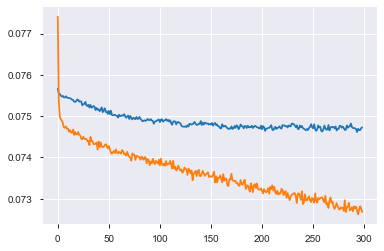

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

### lightgbm Model

In [46]:
import lightgbm as lgb
cf = lgb.LGBMRegressor(n_estimators=500)
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## xgboost

In [44]:
#import xgboost

#cf2 = xgboost.XGBRegressor(n_estimators=100)

#cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

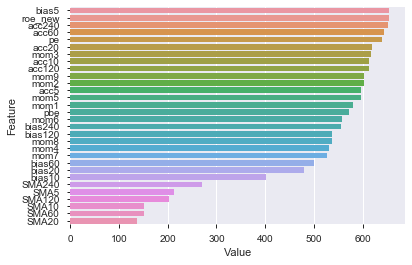

In [48]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

### Ensemble learning

In [49]:
vals = model.predict(dataset_test[feature_names].astype(float))
dataset_test['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_test.index)

vals = cf.predict(dataset_test[feature_names].astype(float))
dataset_test['result2'] = pd.Series(vals, dataset_test.index)

vals = cf2.predict(dataset_test[feature_names].astype(float))
dataset_test['result3'] = pd.Series(vals, dataset_test.index)

C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Dandy\Anaconda3\envs\finlab\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

## 原本的

In [ ]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time, 
        ['bias60', 'bias120', 'bias240', 'mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6'], thresh=0.01)
    
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2016':].cumprod()

s0050 = close['0050']['2016':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

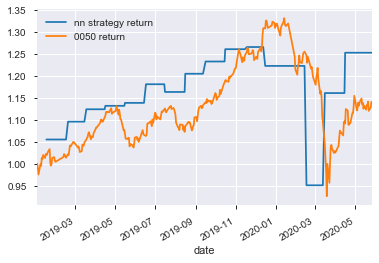

In [53]:
import math


dates = sorted(list(set(dataset_test.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()

s0050 = close['0050']['2019':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()


In [59]:
rs

2019-01-16    1.054885
2019-02-16    1.095565
2019-03-16    1.123801
2019-04-16    1.131634
2019-05-16    1.138340
2019-06-16    1.180857
2019-07-16    1.163242
2019-08-16    1.204773
2019-09-16    1.232673
2019-10-16    1.260728
2019-11-16    1.265670
2019-12-16    1.222606
2020-02-16    0.950514
2020-03-16    1.160743
2020-04-16    1.252684
dtype: float64

## 添加三大反人條件

In [54]:
#(外資+投信+自營商-外資借券).rolling(N1).sum()
#每月15號選出rank前(N2)的股票進行買入
# N1天內法人的增加張數要超過N3張
def leg(n1,n3):
    condition1 = big.rolling(n1).sum() >n3*1000
    return condition1

def rs1(n1,n2,n3):
    import pandas as pd
    dates = sorted(list(set(dataset_test.index)))
    rs = []
    for d in dates:
        
        
        dataset_time = dataset_test.loc[d]
        rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
            
        condition = (rank >= rank.nlargest(n2).iloc[-1]) 
        #r = dataset_time['return'][condition].mean()
            # 開始蝦七八亂改
        rk = dataset_time[condition]['stock_id']
        rd = []
        for n in rk:
            rd.append(n)
    
    #condition1 = big.rolling(n1).sum() >n3*1000
        condition1 = leg(n1,n3)
        #condition1 = lambda x:big.rolling(n1).sum() > n3*1000
        con = pd.DataFrame(condition1.unstack()[rd])
    #con1 = con.pivot_table(index="stock_id",columns="date")
        con0 = con.pivot_table(index="date",columns="stock_id")
        con01 = con0.reindex(every_month, method='ffill').dropna()
        con02 = con01.loc[d][0]
        con03 = con02[con02]
        con04=[]
        for i in con03.index:
            con04.append(i)
            
        test = dataset_time.reset_index().set_index("stock_id")
        lo = test["return"][con04].mean()
        #lo = lo.dropna()
        
         #結束蝦七八亂改
        rs.append(lo * (1-3/1000-1.425/1000*2*0.6))
            
    rs = pd.Series(rs, index=dates).cumprod()
    return rs,con04,condition

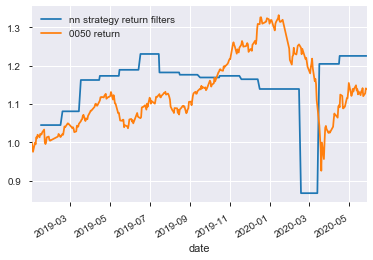

In [56]:
#(68,20,11),(38,17,4)
# 參數尚未最佳化
rs_legal,l,condition_legal = rs1(68,20,11)
rs_legal = pd.Series(rs_legal, index=dates)

s0050 = close['0050']['2019':]

pd.DataFrame({'nn strategy return filters':rs_legal.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()

In [58]:
rs_legal[-1]

1.2251676452309865

### 基本持股 進階持股

stock_id  date      
1569      2020-02-16    1.766896
1615      2020-02-16    1.768705
2367      2020-02-16    1.758841
2377      2020-02-16    1.750695
2838      2020-02-16    1.779255
2851      2020-02-16    1.788949
2889      2020-02-16    1.779513
3048      2020-02-16    1.764679
3231      2020-02-16    1.776874
3374      2020-02-16    1.763139
3406      2020-02-16    1.811663
3605      2020-02-16    1.821981
5347      2020-02-16    1.788329
5907      2020-02-16    1.803747
6185      2020-02-16    1.954295
6441      2020-02-16    1.805452
8040      2020-02-16    1.908987
8088      2020-02-16    1.818101
8271      2020-02-16    1.904869
8489      2020-02-16    1.765100
dtype: float64

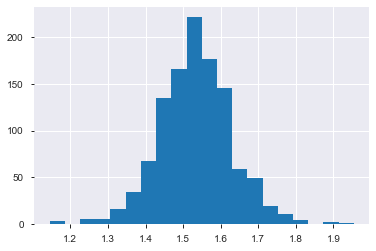

In [25]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

In [26]:
rank[l]

stock_id  date      
1109      2020-02-16    1.561140
2367      2020-02-16    1.758841
2458      2020-02-16    1.572755
2905      2020-02-16    1.637779
3030      2020-02-16    1.594267
3048      2020-02-16    1.764679
9904      2020-02-16    1.516656
dtype: float64

### 分界線

In [12]:
#取得每股價錢加下單
import math
My_acount=200000
for i in l:    
    price = float(vs.get_price(i)['SalePrice'])*1000
    #print(price)
    price_each_stock=My_acount / len(l)
    number_we_need = math.floor(price_each_stock/price)
    #print('stock_price:',+price,"\nThe number of stocks:",+number_we_need)
    vs.sync(['1101', '2330'])

19000.0
stock_price: 19000.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
11350.0
stock_price: 11350.0 
The number of stocks: 1
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
66200.0
stock_price: 66200.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
26250.0
stock_price: 26250.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
20650.0
stock_price: 20650.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
94800.0
stock_price: 94800.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
10700.0
stock_price: 10700.0 
The number of stocks: 1
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
11500.0
stock_price: 11500.0 
The number of stocks: 1
total money 2000000
1101
2330
buy  1101 24.0
buy  2330 3.0
44800.0
stock_price: 44800.0 
The number of stocks: 0
total money 2000000
1101
2330
buy  1101 24

In [ ]:
#(外資+投信+自營商-外資借券).rolling(N1).sum()
#每月15號選出rank前(N2)的股票進行買入
# N1天內法人的增加張數要超過N3張
import tqdm
rmax = 0
n1 = []
for i in tqdm.tqdm_notebook(range(1,100,10)):
    try:
        r,c,condition = rs1(i,50,1)
        rsn = r[-1]
        rmax = 0
        if rmax<rsn:
            rmax = rsn
            print(rmax,i)
            n1.append(i)
        else:
            print(i)
    except:
        pass
    continue

In [ ]:
n1

In [ ]:
import tqdm


n3=[]
#for i in n1:
for k in tqdm.tqdm_notebook(range(1,60,1)):
    try:
        r,c,condition = rs1(38,50,k)
        rsn = r[-1]
        if rmax<rsn:
            
            rmax = rsn
            print(rmax,k)
            
            n3.append(k)
        else:
            print(i,k)
    except:
        pass
    continue

In [ ]:
r,c,condition = rs1(38,50,1)
rsn = r[-1]
rmax = 0
if rmax<rsn:

    rmax = rsn
    print(rmax,1)

    #n3.append(k)

In [ ]:
r,c,condition = rs1(38,50,1)

In [ ]:
rmax

In [ ]:
r,c = rs1(60,50,k)
rsn = r[-1]
if rmax<rsn:
    
    rmax = rsn
    print(rmax,k)
    
    n3.append(k)

In [ ]:

n3

In [ ]:
#step3
n2 = []


for j in tqdm.tqdm_notebook(range(1,100,1)):
    try:
        r,c,con = rs1(38,j,4)
        rsn = r[-1]
        if rmax<rsn:
            rmax = rsn
            print(rmax,j)
            n2.append(j)
        else:
            print(j)
    except:
        pass
    continue

In [ ]:
#we got n1,n2,n3
#r,l = rs1()

In [ ]:
rs_legal

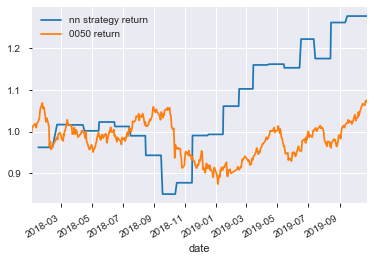

In [24]:
import pandas as pd
rs_legal,l,condition = rs1(68,20,11)
rs_legal = pd.Series(rs, index=dates)

s0050 = close['0050']['2018':]

pd.DataFrame({'nn strategy return':rs_legal.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [25]:
rs_legal[-1]

1.277500492921283

In [26]:
rs[-1]

1.3630837149577797

## 結束法人回合

In [ ]:
import numpy as np
import math
import datetime
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

#ret = triple_barrier(close, 1.07, 0.97, 20)

In [ ]:
def br(c):
    adj_open=data.get('開盤價')
    ret = triple_barrier(adj_open[c],1.2,0.95,21)
    return ret

In [ ]:
c = close.unstack()
c = pd.DataFrame(c)
c.index.set_names(["stock_id","date"],inplace=True)
ml.add_profit_prediction(c)

In [ ]:
a = c[0]
s = a["0050"]
ret = triple_barrier(s,1.07,0.97,22)
date = "2019"
ret.triple_barrier_signal[date].plot()

In [ ]:
ret = triple_barrier(s,1.07,0.97,22)
ret

In [ ]:

s = '20190102'

# you could also import date instead of datetime and use that.
def tsf(date,stock):
    date = datetime.datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8]))
    dates = date.strftime("%Y-%m-%d")
    ret = br(stock)
    w=ret.triple_barrier_profit[dates]
    return w
tsf('20190425','0050')

In [ ]:
#w = br("0050")
#w.triple_barrier_profit["2007-04-28"]
import numpy as np
def get_profit(date,stock):
    try:
        date = datetime.datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8]))
        dates = date.strftime("%Y-%m-%d")
        ret = br(stock)
        profit = ret.triple_barrier_profit[date]
        return profit
    except:
        try:
            date=date + datetime.timedelta(days=2)
            dates = date.strftime("%Y-%m-%d")
            ret = br(stock)
            profit = ret.triple_barrier_profit[date]
            return profit
        except:
            pass
        return np.nan

### 當月持股狀況

stock_id  date      
1615      2019-12-16    1.831609
2324      2019-12-16    1.739013
2354      2019-12-16    1.737746
2423      2019-12-16    1.737735
2433      2019-12-16    1.748977
2882      2019-12-16    1.741385
2891      2019-12-16    1.771239
3008      2019-12-16    1.738840
3312      2019-12-16    1.755941
3548      2019-12-16    1.760181
4974      2019-12-16    1.741502
5209      2019-12-16    1.773756
5245      2019-12-16    1.738037
5312      2019-12-16    1.749533
5410      2019-12-16    1.763476
5609      2019-12-16    1.748333
6167      2019-12-16    1.752918
6184      2019-12-16    1.871779
8150      2019-12-16    1.799163
9943      2019-12-16    1.793866
dtype: float64

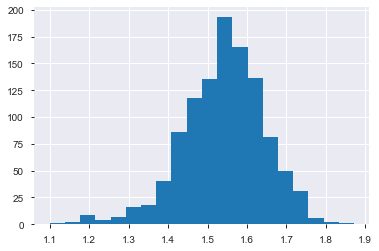

In [33]:
# get the latest dataset

last_date = dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


# remove NaN testcases

#print("Some stocks are skipped due to NaN")
#print(last_dataset[last_dataset[feature_names].isnull().sum(axis=1) != 0].index.get_level_values("stock_id").values)
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
rank[condition]

In [34]:
rank[l]

stock_id  date      
1521      2019-12-16    1.478156
1604      2019-12-16    1.648800
2027      2019-12-16    1.580105
2367      2019-12-16    1.558096
2458      2019-12-16    1.676949
2891      2019-12-16    1.771239
2905      2019-12-16    1.686695
3030      2019-12-16    1.648942
dtype: float64